In [1]:
import os
import re
import cv2
import random
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


In [2]:
IMAGE_SHAPE = (600, 800)
TRAIN_DIR = 'data/images/training/image_2/'
GT_DIR = 'data/images/training/gt_image_2/'
CHOSEN_IMG = 'um_000000.png'

image = cv2.imread(os.path.join(TRAIN_DIR, CHOSEN_IMG))
label = cv2.imread(os.path.join(GT_DIR, CHOSEN_IMG))

In [3]:
def rename_files(directory, testing = True):
    for filename in os.listdir(GT_DIR):
        if filename.startswith('uu_road'):
            if testing == True:
                print(filename)
                print('uu'+filename[7:])
            elif testing == False:
                os.rename(GT_DIR+filename,GT_DIR+'uu'+filename[7:])

In [18]:
def gen_batch_function(train_dir, gt_dir, image_shape):
    """
    Generate function to create batches of training data
    :param data_folder: Path to folder that contains all the datasets
    :param image_shape: Tuple - Shape of image
    :return:
    """
    def get_batches_fn(batch_size):
        """
        Create batches of training data
        :param batch_size: Batch Size
        :return: Batches of training data
        """
        image_paths = glob(os.path.join(train_dir, '*.png'))
        label_paths = glob(os.path.join(gt_dir, '*.png'))
        background_color = np.array([255, 0, 0])

        random.shuffle(image_paths)
        for batch_i in range(0, len(image_paths), batch_size):
            images = []
            gt_images = []
            for image_file in image_paths[batch_i:batch_i+batch_size]:
                gt_image_file = gt_dir+os.path.basename(image_file)

                image = scipy.misc.imresize(scipy.misc.imread(image_file), image_shape)
                gt_image = scipy.misc.imresize(scipy.misc.imread(gt_image_file), image_shape)

                gt_bg = np.all(gt_image == background_color, axis=2)
                gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
                gt_image = np.dstack((gt_bg, np.invert(gt_bg)))
                
                images.append(image)
                gt_images.append(gt_image)

            yield np.array(images), np.array(gt_images)
    return get_batches_fn

In [23]:
get_batches_fn = gen_batch_function(TRAIN_DIR, GT_DIR, (160, 576))

(160, 576, 2)


/home/pablo/miniconda3/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/pablo/miniconda3/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/home/pablo/miniconda3/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/pablo/miniconda3/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


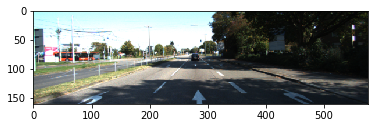

In [29]:
test_img, test_lbl = next(get_batches_fn(1))
test_img = test_img[0]
test_lbl = test_lbl[0]

Text(0.5,1,'Road Label')

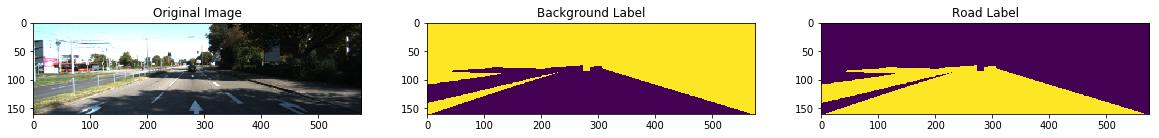

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,15))
ax1.imshow(test_img)
ax1.set_title('Original Image')
ax2.imshow(test_lbl[:,:,0])
ax2.set_title('Background Label')
ax3.imshow(test_lbl[:,:,1])
ax3.set_title('Road Label')